In [1]:
%load_ext gvmagic
import ddueruem
ddueruem.init(silent=True, no_log=True)

In [2]:
expr = ddueruem.parsing("examples/sandwich.dimacs")
expr.verbose()

'(Flatbread0) ∧ (Vegetables ∨ ¬Cucumber) ∧ (Vegetables ∨ ¬FlatbreadSalami) ∧ (Vegetables ∨ ¬FlatbreadFlatbread) ∧ (Cheese ∨ ¬FlatbreadCucumber) ∧ (¬Cheddar ∨ Cheese) ∧ (Cheese ∨ ¬FlatbreadMeat) ∧ (¬Full ∨ Bread) ∧ (¬Flatbread ∨ Bread) ∧ (Bread ∨ ¬FlatbreadVegetables) ∧ (Flatbread ∨ Full ∨ ¬Bread ∨ FlatbreadVegetables) ∧ (¬Flatbread ∨ ¬Full) ∧ (¬Full ∨ ¬FlatbreadVegetables) ∧ (¬Flatbread ∨ ¬FlatbreadVegetables) ∧ (¬Salami ∨ Meat) ∧ (Meat ∨ ¬FlatbreadCheddar) ∧ (Meat ∨ ¬FlatbreadFull) ∧ (Salami ∨ ¬Meat ∨ FlatbreadCheddar ∨ FlatbreadFull) ∧ (¬Bread ∨ Flatbread0) ∧ (¬Cheese ∨ Flatbread0) ∧ (¬Meat ∨ Flatbread0) ∧ (¬Vegetables ∨ Flatbread0) ∧ (Bread ∨ ¬Flatbread0) ∧ (FlatbreadCucumber ∨ ¬FlatbreadBread) ∧ (¬FlatbreadCheese ∨ FlatbreadCucumber) ∧ (FlatbreadCheese ∨ ¬FlatbreadCucumber ∨ FlatbreadBread) ∧ (¬FlatbreadCheese ∨ ¬FlatbreadBread)'

In [3]:
order = ddueruem.ordering(expr, "force-triage") # Use the converging FORCE method for preordering

# A resonable order:
order = [4, 10, 15, 1, 12, 16, 5, 8, 11, 0, 6, 7, 9, 13, 17, 14, 3, 18, 2]

In [4]:
from adapters import BDD, Adapter_BUDDY as BUDDY

bdd = BDD(BUDDY)
bdd.buildFrom(expr, order)

In [5]:
bdd.dump()
bdd.meta

{'ddueruem-version': 'v2021-07',
 'lib-name-stub': 'buddy',
 'lib-name': 'BuDDy 2.4',
 'input-name': 'examples/sandwich.dimacs',
 'input-hash': '87162f9cca5f0118440d6db21f1653be',
 'n_vars': 19,
 'n_cnf_clauses': 27,
 'n_tautological_clauses': 0,
 'runtime-parsing': '0.002 s',
 'runtime-preodering': '0.004 s',
 'runtime-compilation': '0.000 s',
 'n_nodes': '25',
 'root': '0:242',
 'order': '5,11,16,2,13,17,6,9,12,1,7,8,10,14,18,15,4,19,3'}

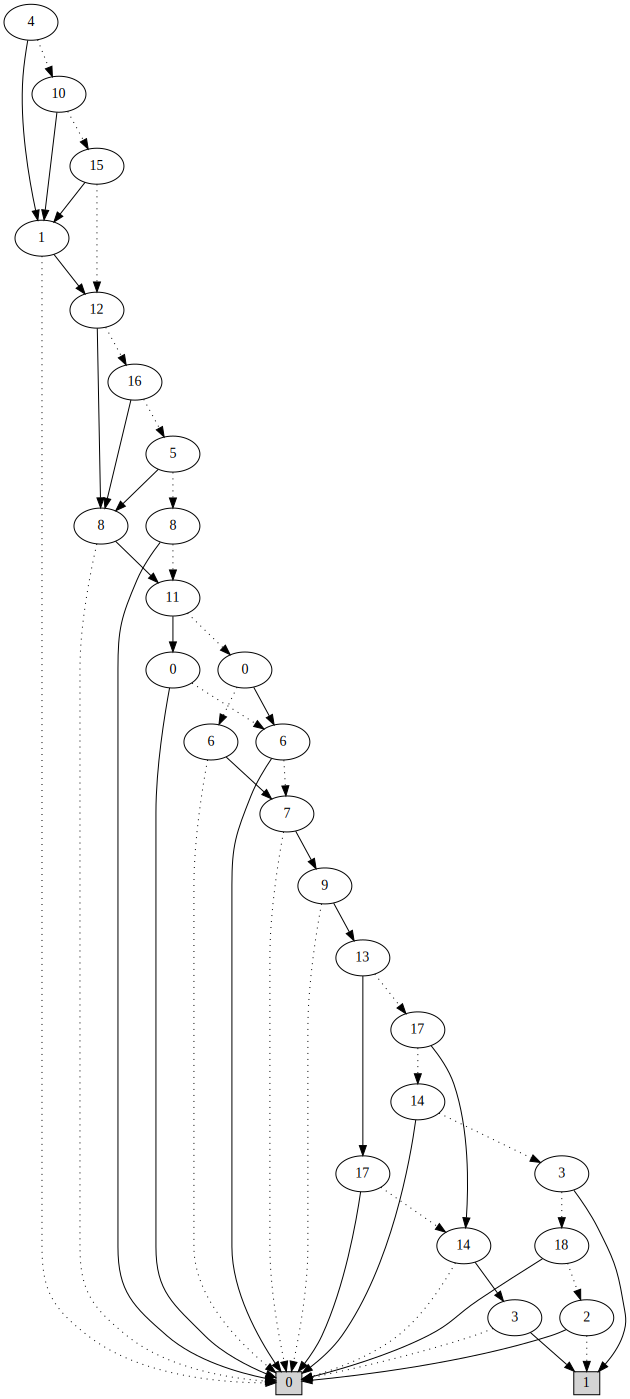

In [6]:
%dotobj bdd